# dataframe 만들기

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chars2vec
import sklearn.decomposition

# Load Inutition Engineering pretrained model
# Models names: 'eng_50', 'eng_100', 'eng_150', 'eng_200', 'eng_300'
c2v_model = chars2vec.load_model('eng_50')


false = pd.read_csv("friend.txt",sep='\n')
words = false.word.tolist()


# Create word embeddings
word_embeddings = c2v_model.vectorize_words(words)

# Project embeddings on plane using the PCA
projection_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(word_embeddings)
projection_2d

#dataframe
df = pd.DataFrame(list(projection_2d),index = list(words), columns = ['x','y'])
df

,x,y
friend,-1.619697,-0.505088
fred,-2.362016,-0.028048
fran,-0.962576,0.843842
fand,-1.398999,0.460926
frind,-1.493025,-0.043218
friends,-1.709716,-0.247920
Friends,-1.709716,-0.247920
frieeeeends,-0.802030,-1.566095
fireds,-2.166736,0.107979
administration,2.766735,1.141103


# triggerword_Euclidean Distance

firends 와 fred 의 거리는  0.27246731942136293
admit 와 admire 의 거리는  1.0801996275780104
understanding 와 Umderstoneding 의 거리는  0.626931496768179


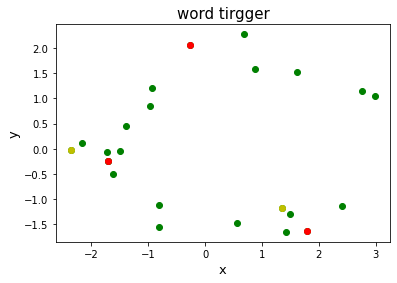

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import chars2vec
import sklearn.decomposition

# Load Inutition Engineering pretrained model
# Models names: 'eng_50', 'eng_100', 'eng_150', 'eng_200', 'eng_300'
c2v_model = chars2vec.load_model('eng_50')

false = pd.read_csv("friend.txt",sep='\n')
words = false.word.tolist()


# Create word embeddings
word_embeddings = c2v_model.vectorize_words(words)

# Project embeddings on plane using the PCA
projection_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(word_embeddings)

#dataframe
df = pd.DataFrame(list(projection_2d),index = list(words), columns = ['x','y'])

# words 는 red, 특정 words 는 green
plt.scatter(df.values[:,0], df.values[:,1], c='g')
plt.scatter(df.loc['Friends'][0], df.loc['Friends'][1], c= 'r')
plt.scatter(df.loc['admit'][0], df.loc['admit'][1], c= 'r')
plt.scatter(df.loc['Understanding'][0], df.loc['Understanding'][1], c= 'r')


# trigger word
# 0 < dist < 0.7 이면 true
import numpy as np
def dist(x, y):
    return np.sqrt(np.sum((x-y)**2))

# input 벡터값
docQ1 = df.values[0]
docQ2 = df.values[11]
docQ3 = df.values[21]
distance1 = dist(df.loc['Friends'], docQ1)
distance2 = dist(df.loc['admit'], docQ2)
distance3 = dist(df.loc['Understanding'], docQ3)

if (distance1 < 0.7) & (distance1 >0) :
    plt.scatter(df.values[1][0], df.values[1][1], c='y')
else :
    pass
if (distance2 < 0.7) & (distance2 >0) :
    plt.scatter(df.values[11][0], df.values[11][1], c='y')
else :
    pass
if (distance3 < 0.7) & (distance3 >0) :
    plt.scatter(df.values[21][0], df.values[21][1], c='y')
else :
    pass

# 제목과 축레이블
plt.title("word tirgger", fontsize = 15)
plt.xlabel("x",fontsize = 13)
plt.ylabel("y",fontsize = 13)


print("firends 와", df.index[1], '의 거리는 ', distance1)
print("admit 와", df.index[11], '의 거리는 ', distance2)
print("understanding 와", df.index[21], '의 거리는 ', distance3)